### Problem in brief
#### Use case:
Is there a relationship between humidity and temperature?
What about between humidity and apparent temperature?
Can we predict the apparent temperature given the humidity?

#### Visualize and understand the dataset

In [1]:
# load the dataset
import pandas as pd
df = pd.read_csv('sample_data/weatherdataset.csv')
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [3]:
# Use a small subset of the dataset
subset_size = 5000  # Adjust this based on your preferences
df_subset = df.sample(n=subset_size, random_state=42)

### Preprocess the dataset as specified in the data mining process

In [4]:
print(df_subset.isnull().sum())

Formatted Date               0
Summary                      0
Precip Type                 31
Temperature (C)              0
Apparent Temperature (C)     0
Humidity                     0
Wind Speed (km/h)            0
Wind Bearing (degrees)       0
Visibility (km)              0
Loud Cover                   0
Pressure (millibars)         0
Daily Summary                0
dtype: int64


In [5]:
# drop all rows with atleast one NaN
new_df = df_subset.dropna(axis = 0, how ='any')


In [6]:
# check null value count
print(new_df.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [7]:

print("Number of duplicates : " + str(new_df.duplicated().sum()))

# dropping duplicate values
new_df = new_df.drop_duplicates()

print(new_df.duplicated().sum())

new_df = new_df.reset_index(drop=True)


Number of duplicates : 0
0


In [8]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            4969 non-null   object 
 1   Summary                   4969 non-null   object 
 2   Precip Type               4969 non-null   object 
 3   Temperature (C)           4969 non-null   float64
 4   Apparent Temperature (C)  4969 non-null   float64
 5   Humidity                  4969 non-null   float64
 6   Wind Speed (km/h)         4969 non-null   float64
 7   Wind Bearing (degrees)    4969 non-null   float64
 8   Visibility (km)           4969 non-null   float64
 9   Loud Cover                4969 non-null   float64
 10  Pressure (millibars)      4969 non-null   float64
 11  Daily Summary             4969 non-null   object 
dtypes: float64(8), object(4)
memory usage: 466.0+ KB
None


In [9]:
print(new_df["Loud Cover"].describe())
new_df.drop('Loud Cover', axis=1, inplace=True)

print(new_df["Formatted Date"].describe())
new_df.drop('Formatted Date', axis=1, inplace=True)

print(new_df["Daily Summary"].describe())
new_df.drop('Daily Summary', axis=1, inplace=True)

count    4969.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Loud Cover, dtype: float64
count                              4969
unique                             4969
top       2015-09-19 17:00:00.000 +0200
freq                                  1
Name: Formatted Date, dtype: object
count                                  4969
unique                                  182
top       Mostly cloudy throughout the day.
freq                                   1018
Name: Daily Summary, dtype: object


In [10]:
new_df.count()

Summary                     4969
Precip Type                 4969
Temperature (C)             4969
Apparent Temperature (C)    4969
Humidity                    4969
Wind Speed (km/h)           4969
Wind Bearing (degrees)      4969
Visibility (km)             4969
Pressure (millibars)        4969
dtype: int64

### Handle Outliers

<Axes: >

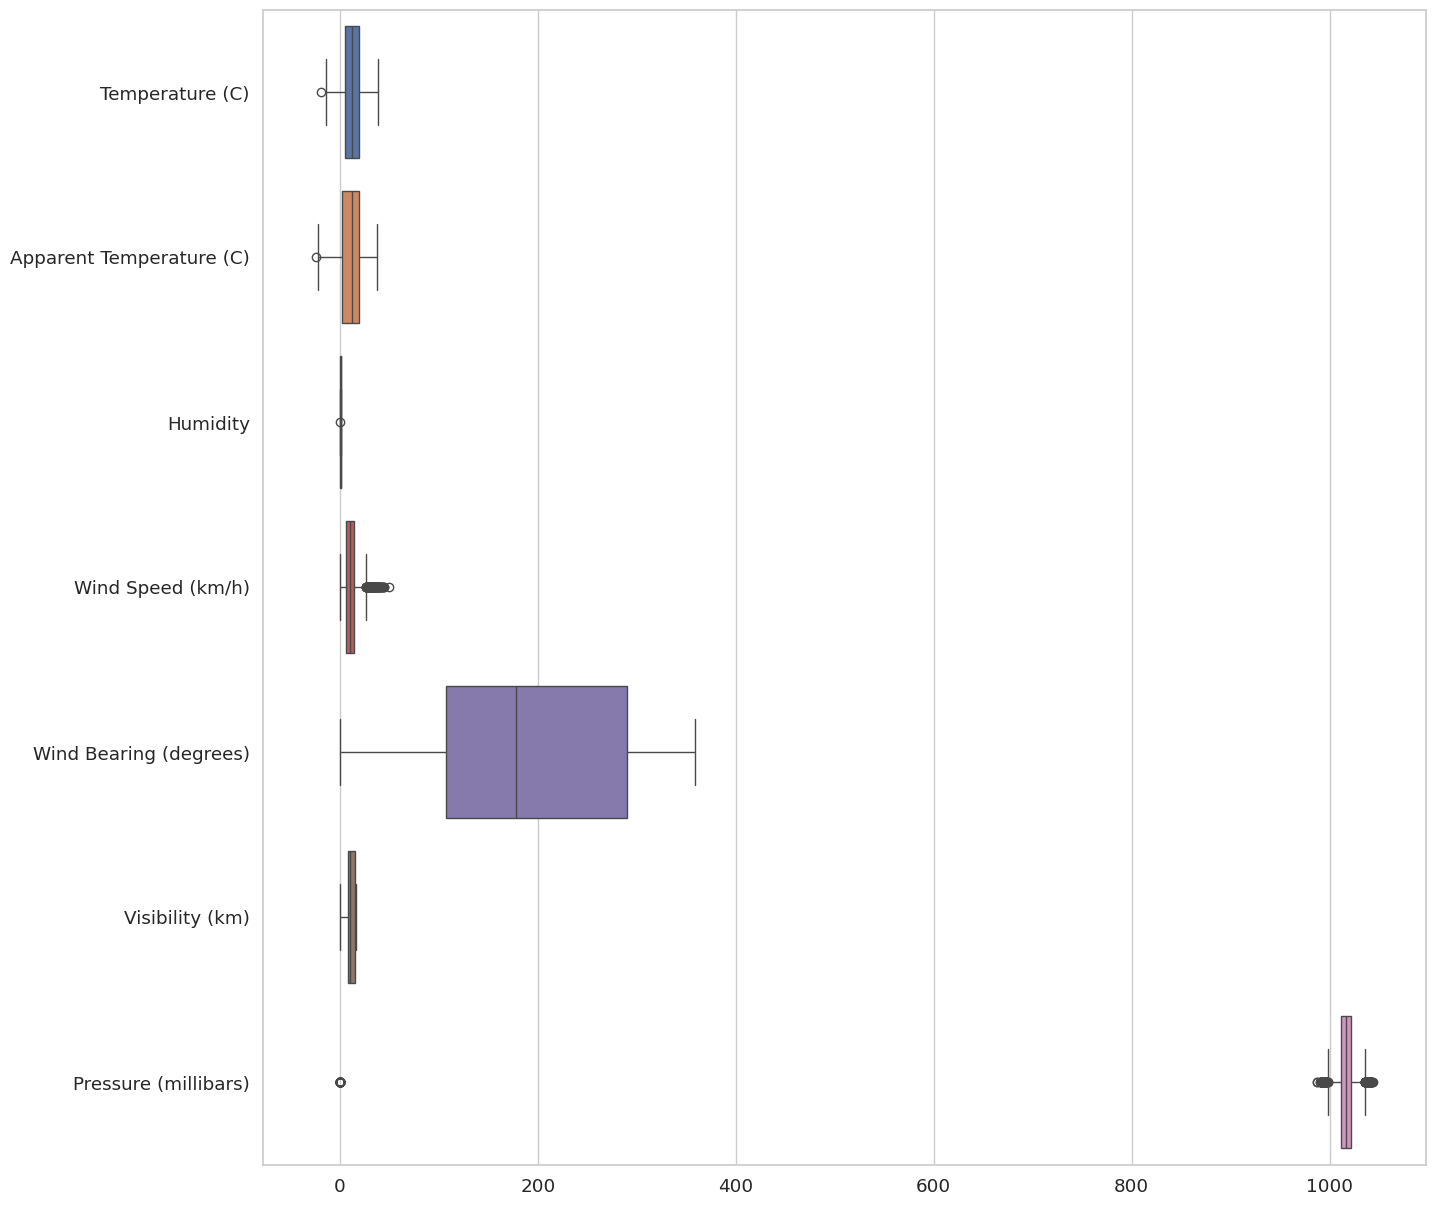

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.2, style='whitegrid')
stats_df_without_outliers = new_df.drop(["Summary", "Precip Type"], axis=1)
sns.boxplot(data=stats_df_without_outliers, orient="h")

Before Shape: (4969, 9)
After Shape: (4969, 9)


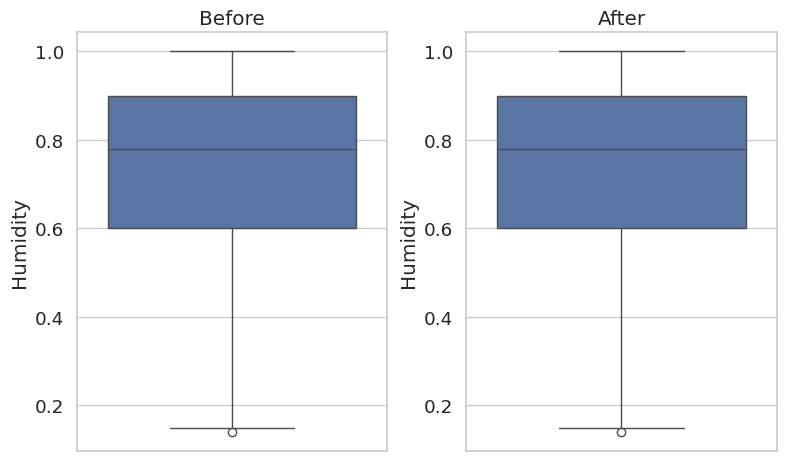

In [12]:
sns.set(rc={'figure.figsize':(8,5)}, font_scale=1.2, style='whitegrid')
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout()

## DataFrame
print("Before Shape:",new_df.shape)

## Removing 0 from column values
df_humid = new_df.loc[~(new_df['Humidity'] == 0)]
## Visulization
print("After Shape:",df_humid.shape)

sns.boxplot(new_df["Humidity"],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df_humid["Humidity"],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Before Shape: (4969, 9)
After Shape: (4969, 9)


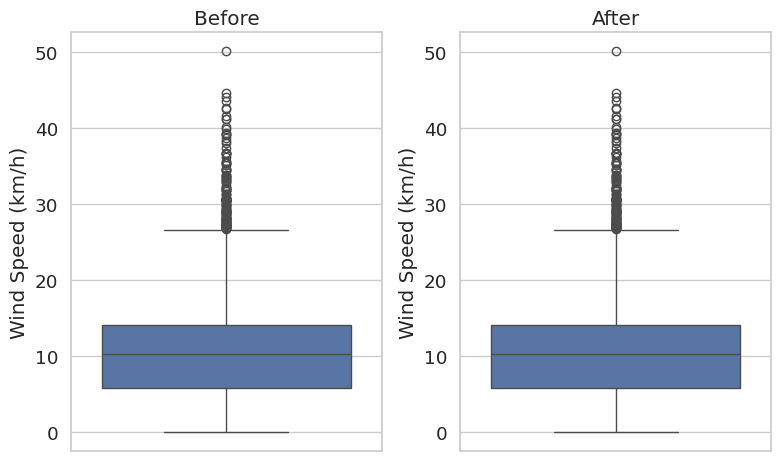

In [13]:
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout()

## DataFrame
print("Before Shape:",df_humid.shape)
## Removing 0 from column values
df_wind_speed = df_humid.loc[(df_humid['Wind Speed (km/h)'] < 60)]
## Visulization
print("After Shape:",df_wind_speed.shape)

sns.boxplot(df_humid["Wind Speed (km/h)"],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df_wind_speed["Wind Speed (km/h)"],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Before Shape: (4969, 9)
After Shape: (4915, 9)


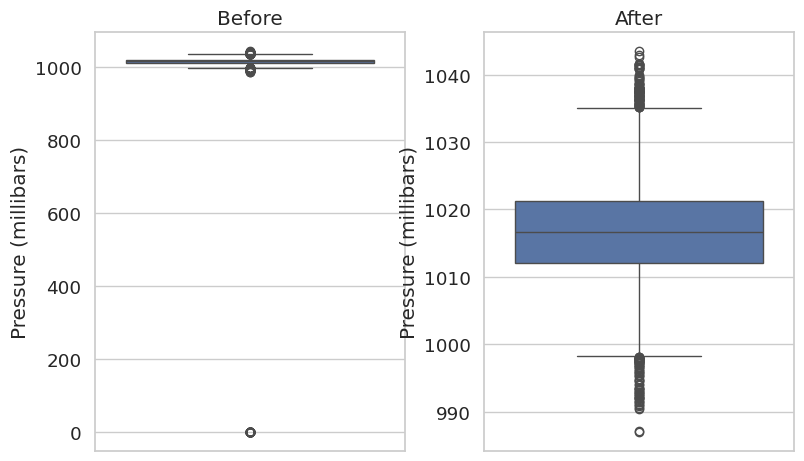

In [14]:
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout()

## DataFrame
print("Before Shape:",df_wind_speed.shape)

## Removing 0 from column values
df_pressure = df_wind_speed.loc[~(df_wind_speed['Pressure (millibars)'] == 0)]
## Visulization
print("After Shape:",df_pressure.shape)

sns.boxplot(df_wind_speed["Pressure (millibars)"],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df_pressure["Pressure (millibars)"],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
df2 = df_pressure

<Axes: >

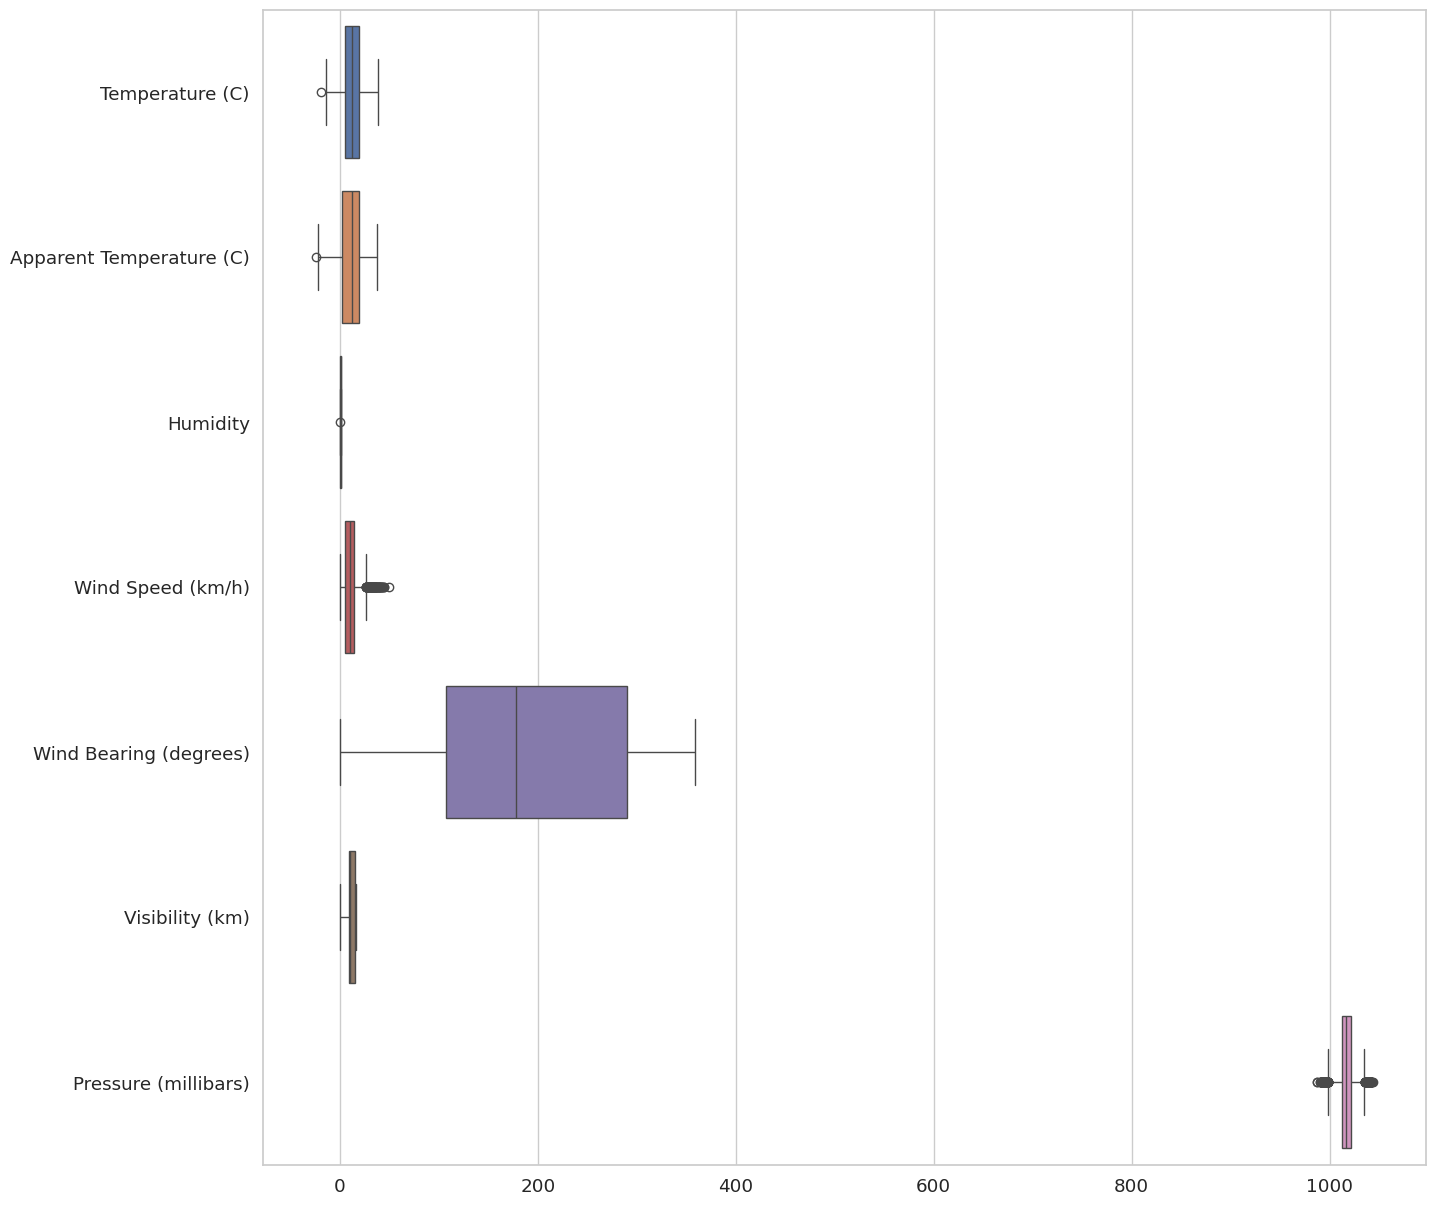

In [15]:
sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.2, style='whitegrid')
stats_df_without_outliers = df2.drop(["Summary", "Precip Type"], axis=1)
sns.boxplot(data=stats_df_without_outliers, orient="h")

### Q-Q plots and histograms

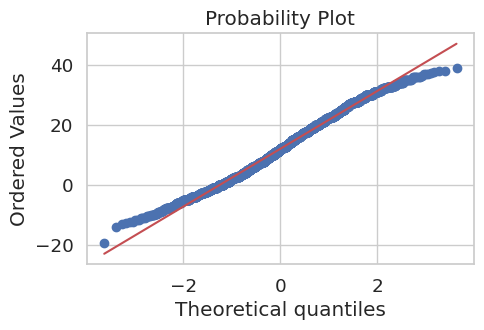

<Axes: >

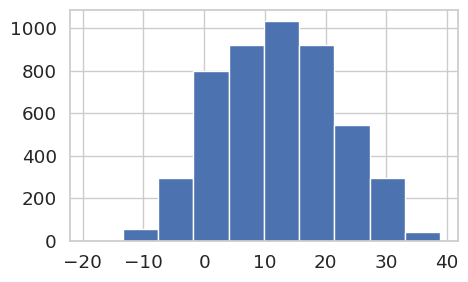

In [16]:
# import the libraries
import scipy.stats as stats

sns.set(rc={'figure.figsize':(5,3)}, font_scale=1.2, style='whitegrid')
stats.probplot(df2["Temperature (C)"], dist="norm", plot=plt)
plt.show()
df2["Temperature (C)"].hist()

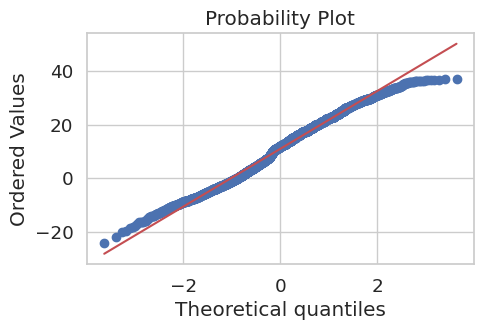

<Axes: >

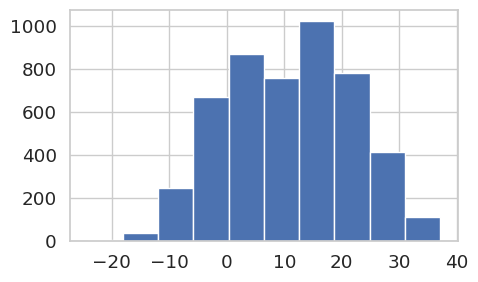

In [17]:
stats.probplot(df2["Apparent Temperature (C)"], dist="norm", plot=plt)
plt.show()
df2["Apparent Temperature (C)"].hist()

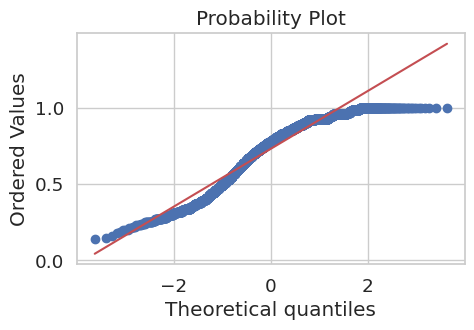

<Axes: >

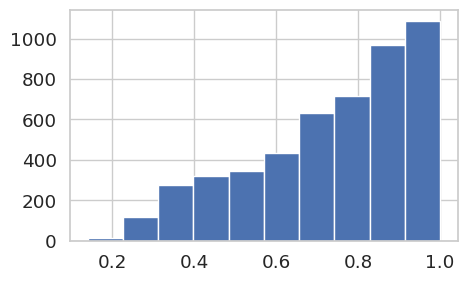

In [18]:
stats.probplot(df2["Humidity"], dist="norm", plot=plt)
plt.show()
df2["Humidity"].hist()

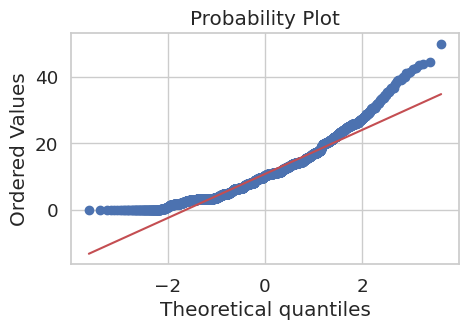

<Axes: >

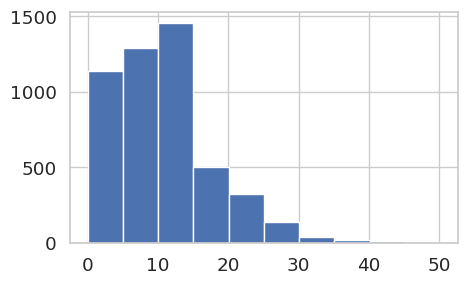

In [19]:
stats.probplot(df2["Wind Speed (km/h)"], dist="norm", plot=plt)
plt.show()
df2["Wind Speed (km/h)"].hist()

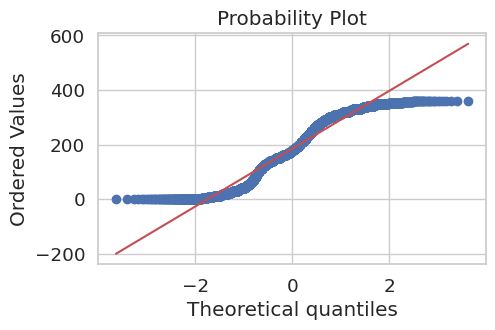

<Axes: >

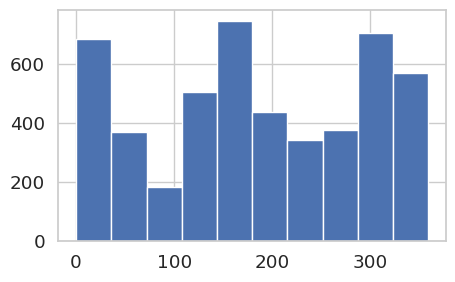

In [20]:
stats.probplot(df2["Wind Bearing (degrees)"], dist="norm", plot=plt)
plt.show()
df2["Wind Bearing (degrees)"].hist()

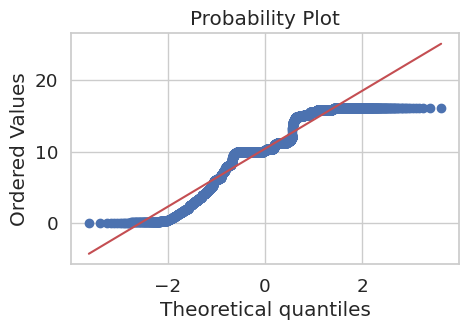

<Axes: >

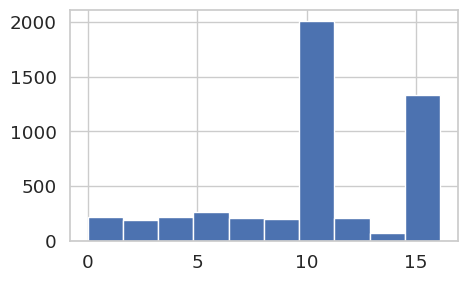

In [21]:
stats.probplot(df2["Visibility (km)"], dist="norm", plot=plt)
plt.show()
df2["Visibility (km)"].hist()

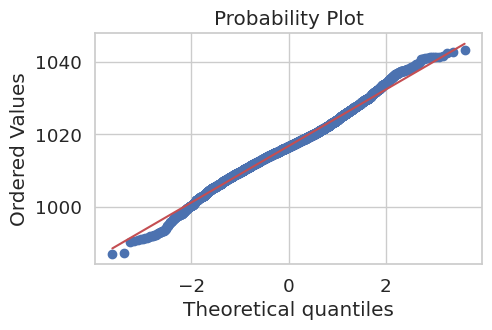

<Axes: >

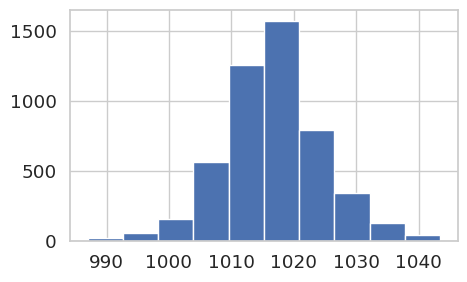

In [22]:
stats.probplot(df2["Pressure (millibars)"], dist="norm", plot=plt)
plt.show()
df2["Pressure (millibars)"].hist()

### Train-Test Split

In [23]:
df_features= df2.drop('Apparent Temperature (C)', axis=1)
df_target = pd.DataFrame(df2['Apparent Temperature (C)'], columns=["Apparent Temperature (C)"])

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 101)

x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

### Data Transformation - Handle Skewness

[[<Axes: title={'center': 'Temperature (C)'}>
  <Axes: title={'center': 'Humidity'}>]
 [<Axes: title={'center': 'Wind Speed (km/h)'}>
  <Axes: title={'center': 'Wind Bearing (degrees)'}>]
 [<Axes: title={'center': 'Visibility (km)'}>
  <Axes: title={'center': 'Pressure (millibars)'}>]]
[[<Axes: title={'center': 'Temperature (C)'}>
  <Axes: title={'center': 'Humidity'}>]
 [<Axes: title={'center': 'Wind Speed (km/h)'}>
  <Axes: title={'center': 'Wind Bearing (degrees)'}>]
 [<Axes: title={'center': 'Visibility (km)'}>
  <Axes: title={'center': 'Pressure (millibars)'}>]]
[[<Axes: title={'center': 'Apparent Temperature (C)'}>]]
[[<Axes: title={'center': 'Apparent Temperature (C)'}>]]


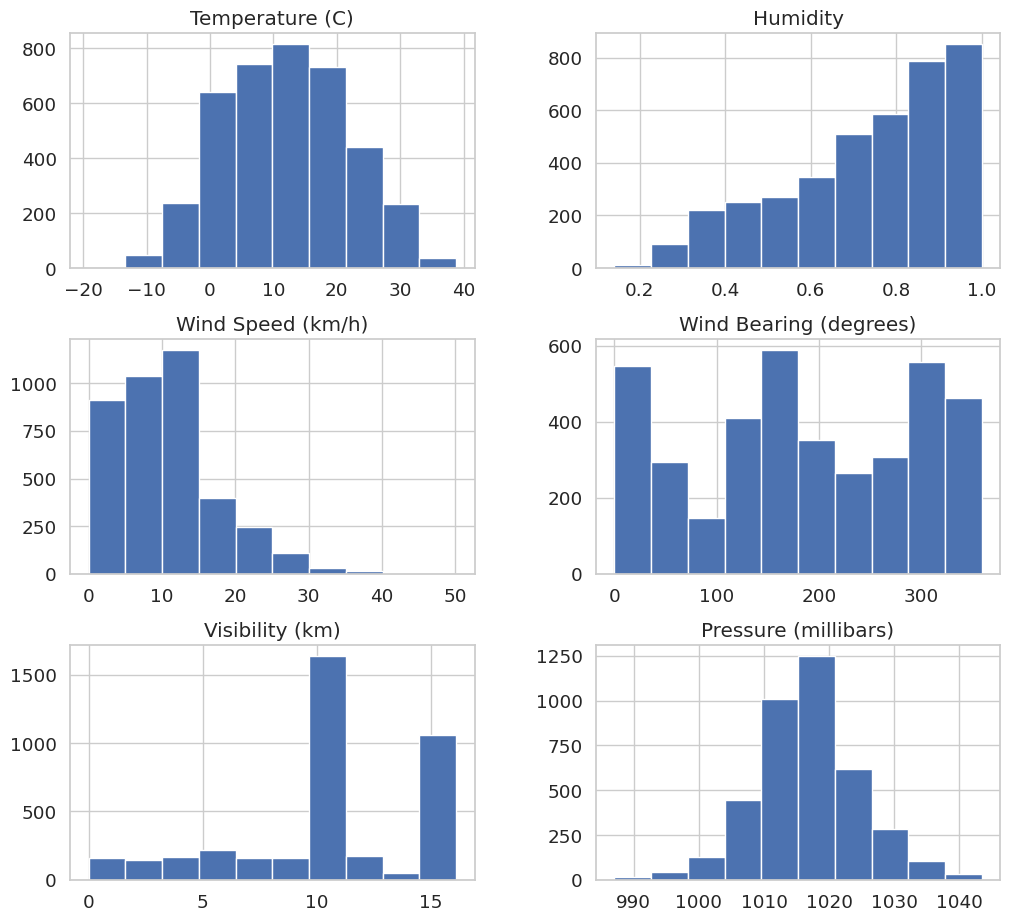

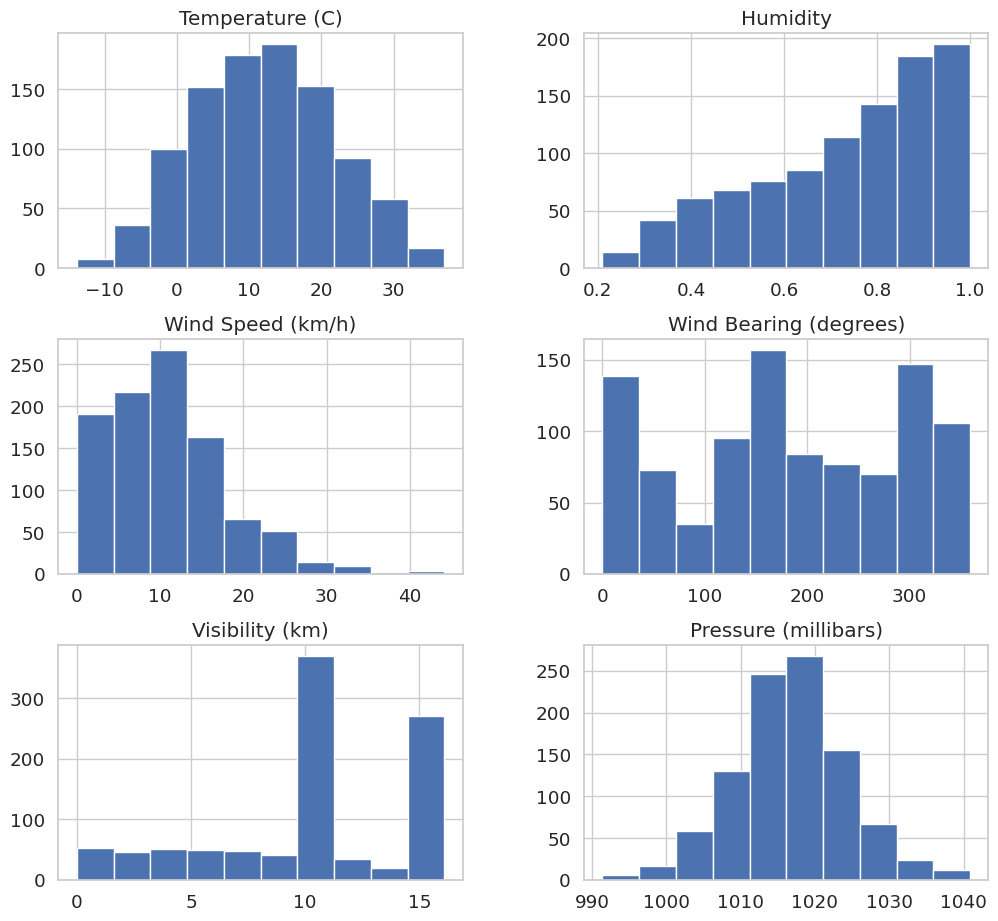

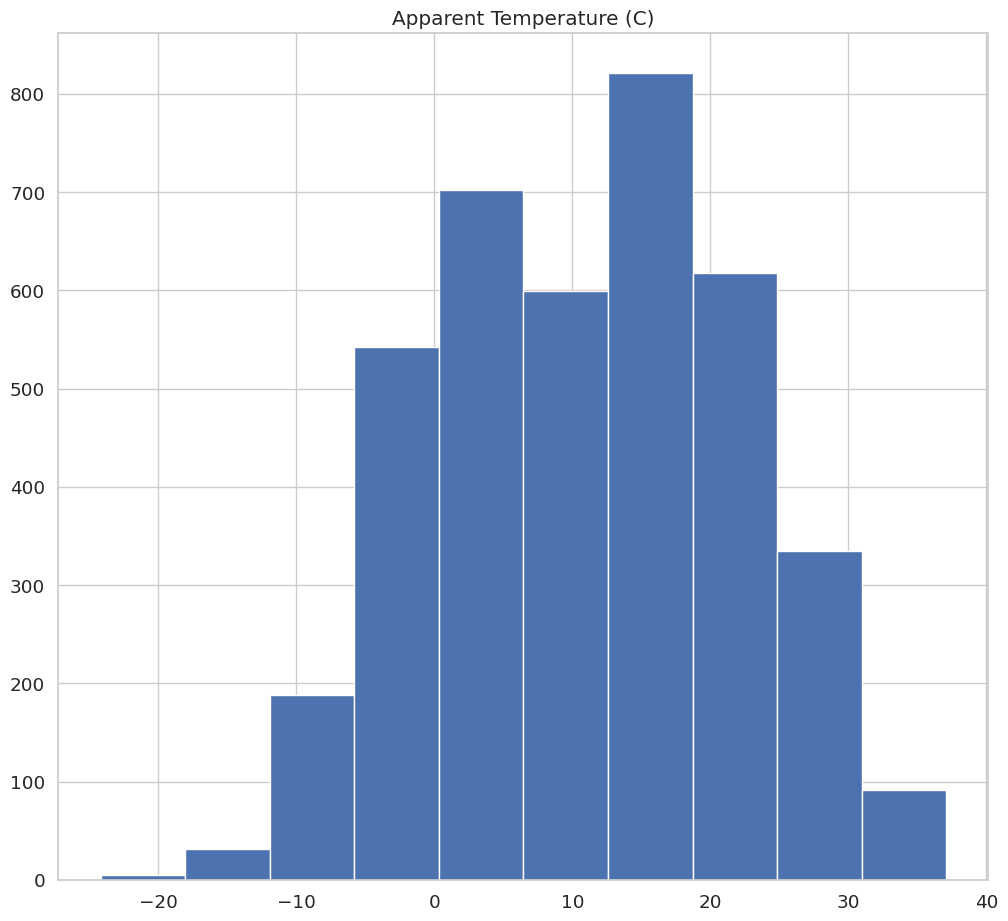

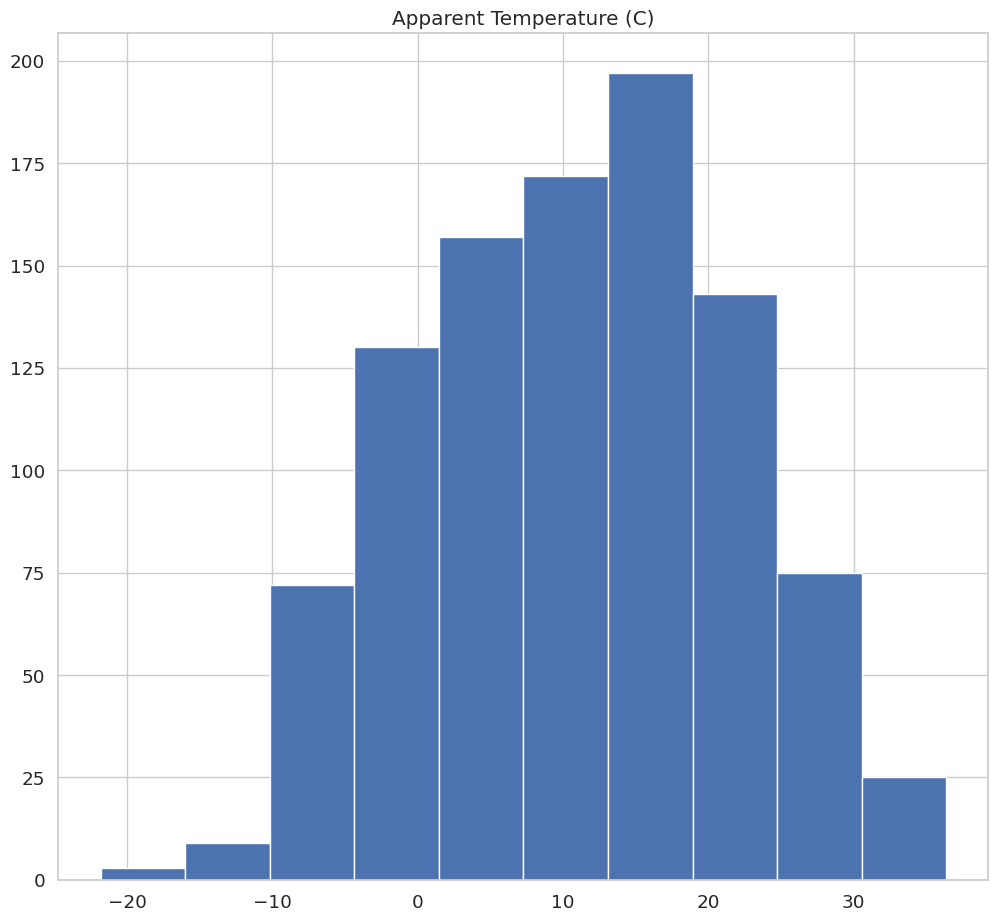

In [25]:
sns.set(rc={'figure.figsize':(12,11)}, font_scale=1.2, style='whitegrid')
print(x_train.hist())
print(x_test.hist())
print(y_train.hist())
print(y_test.hist())

In [26]:
# import the needed packages.
import numpy as np
from sklearn.preprocessing import FunctionTransformer

#left skewed data
# create columns variables to hold the columns that need transformation
columns = ['Humidity']

# create the function transformer object with logarithm transformation
exponential_transformer = FunctionTransformer(lambda x: x ** 3, validate=True)

# apply the transformation to your train data
data_new = exponential_transformer.transform(x_train[columns])
df_left_skewed = pd.DataFrame(data_new, columns=columns)
df_left_skewed = df_left_skewed.reset_index(drop=True)
x_train["Humidity"] = df_left_skewed["Humidity"]

# apply the transformation to your test data
data_new = exponential_transformer.transform(x_test[columns])
df_left_skewed = pd.DataFrame(data_new, columns=columns)
df_left_skewed = df_left_skewed.reset_index(drop=True)
x_test["Humidity"] = df_left_skewed["Humidity"]

In [27]:
#right skewed data
# create columns variables to hold the columns that need transformation
columns = ['Wind Speed (km/h)']

# create the function transformer object with logarithm transformation
square_root_transformation = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation to your train data
data_new = square_root_transformation.transform(x_train[columns])
df_right_skewed = pd.DataFrame(data_new, columns=columns)
df_right_skewed = df_right_skewed.reset_index(drop=True)
x_train["Wind Speed (km/h)"] = df_right_skewed["Wind Speed (km/h)"]

# apply the transformation to your train data
data_new = square_root_transformation.transform(x_test[columns])
df_right_skewed = pd.DataFrame(data_new, columns=columns)
df_right_skewed = df_right_skewed.reset_index(drop=True)
x_test["Wind Speed (km/h)"] = df_right_skewed["Wind Speed (km/h)"]

### Feature Coding Techniques

* One-hot Encoding-Representation of categorical variables as binary vectors.
* Integer (Label) Encoding-Converting the labels into the numeric form to
transform them into a machine-readable form.

In [28]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# We fitting data
onehot_encoder.fit(x_train[['Summary']])
column_names = onehot_encoder.get_feature_names_out(['Summary'])

# transforming testing data
onehot_encoder_train_df = pd.DataFrame(onehot_encoder.transform(x_train[['Summary']]).toarray(),columns=column_names)
onehot_encoder_test_df = pd.DataFrame(onehot_encoder.transform(x_test[['Summary']]).toarray(),columns=column_names)

x_train = x_train.join(onehot_encoder_train_df)
x_test = x_test.join(onehot_encoder_test_df)
x_train.drop('Summary', axis=1, inplace=True)
x_test.drop('Summary', axis=1, inplace=True)

In [29]:
x_train["Precip Type"].unique()

array(['rain', 'snow'], dtype=object)

In [30]:
# label encoding for Precip Type - Training Data
x_train['Precip Type']=x_train['Precip Type'].astype('category')
x_train['Precip Type']=x_train['Precip Type'].cat.codes

# label encoding for Precip Type - Testing Data
x_test['Precip Type']=x_test['Precip Type'].astype('category')
x_test['Precip Type']=x_test['Precip Type'].cat.codes

### Standardized the features

In [31]:
from sklearn.preprocessing import StandardScaler

feature_columns = ['Temperature (C)', 'Wind Bearing (degrees)', 'Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']
# for feature data
x_train_standardize = x_train[feature_columns].copy()
x_test_standardize = x_test[feature_columns].copy()

# Create the scaler object
scaler = StandardScaler()
# Fit the data to scaler
scaler.fit(x_train_standardize)
x_train_scaled = scaler.transform(x_train_standardize)
x_test_scaled = scaler.transform(x_test_standardize)
df_standardized_x_train = pd.DataFrame(x_train_scaled, columns = x_train_standardize.columns)
df_standardized_x_test = pd.DataFrame(x_test_scaled, columns = x_test_standardize.columns)

In [32]:
target_columns = ['Apparent Temperature (C)']
# for target data
y_train_standardize = y_train[target_columns].copy()
y_test_standardize = y_test[target_columns].copy()

# Create the scaler object
scaler = StandardScaler()
# Fit the data to scaler
scaler.fit(y_train_standardize)
y_train_scaled = scaler.transform(y_train_standardize)
y_test_scaled = scaler.transform(y_test_standardize)
df_standardized_y_train = pd.DataFrame(y_train_scaled, columns = y_train_standardize.columns)
df_standardized_y_test = pd.DataFrame(y_test_scaled, columns = y_test_standardize.columns)

x_train[feature_columns] = df_standardized_x_train
x_test[feature_columns] = df_standardized_x_test
y_train[target_columns] = df_standardized_y_train
y_test[target_columns] = df_standardized_y_test

**Feature Discretization** - Normally we perform discretization when a variable is
having a very wide range with very little frequency of values.
But in this dataset, normally all the columns are having relatively high frequencies. So I think it's not much needed to perform a discretization.
Therefore I didn't perform the discretization for this dataset.

In [33]:
print(x_train.describe(include="all"))

       Precip Type  Temperature (C)      Humidity  Wind Speed (km/h)  \
count  3932.000000     3.932000e+03  3.932000e+03       3.932000e+03   
mean      0.112665     2.439554e-17 -4.336985e-17       4.273737e-16   
std       0.316223     1.000127e+00  1.000127e+00       1.000127e+00   
min       0.000000    -3.223174e+00 -1.646055e+00      -2.877328e+00   
25%       0.000000    -7.427099e-01 -9.022336e-01      -6.548812e-01   
50%       0.000000    -1.710192e-03 -4.230362e-04       8.802048e-02   
75%       0.000000     7.093284e-01  8.032547e-01       6.163178e-01   
max       1.000000     2.763886e+00  1.832301e+00       3.704954e+00   

       Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
count            3.932000e+03     3.932000e+03          3.932000e+03   
mean            -8.131847e-17     1.612816e-16         -7.248186e-15   
std              1.000127e+00     1.000127e+00          1.000127e+00   
min             -1.687367e+00    -2.510602e+00         -3.78121

### Perform Feature Engineering

#### Significant Features

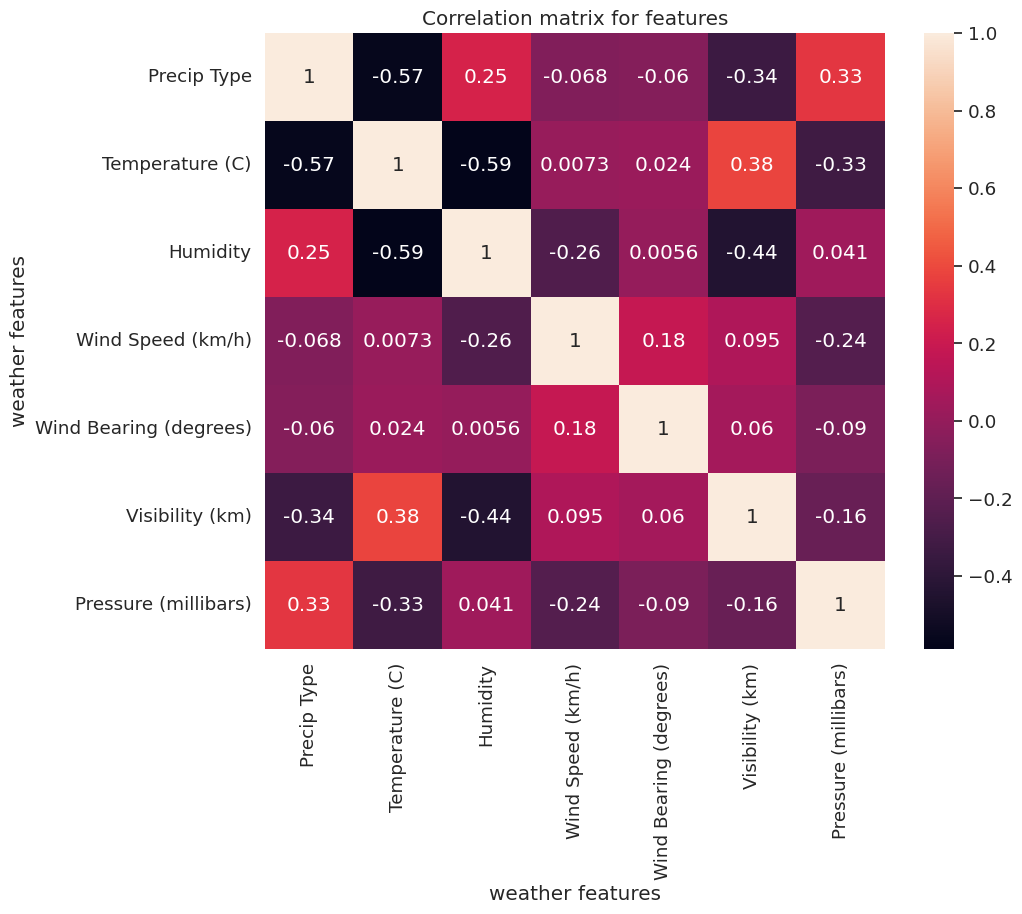

In [34]:
# correlation matrix without target
correlation_mat = x_train.iloc[:,:7].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix for features")
plt.xlabel("weather features")
plt.ylabel("weather features")
plt.show()

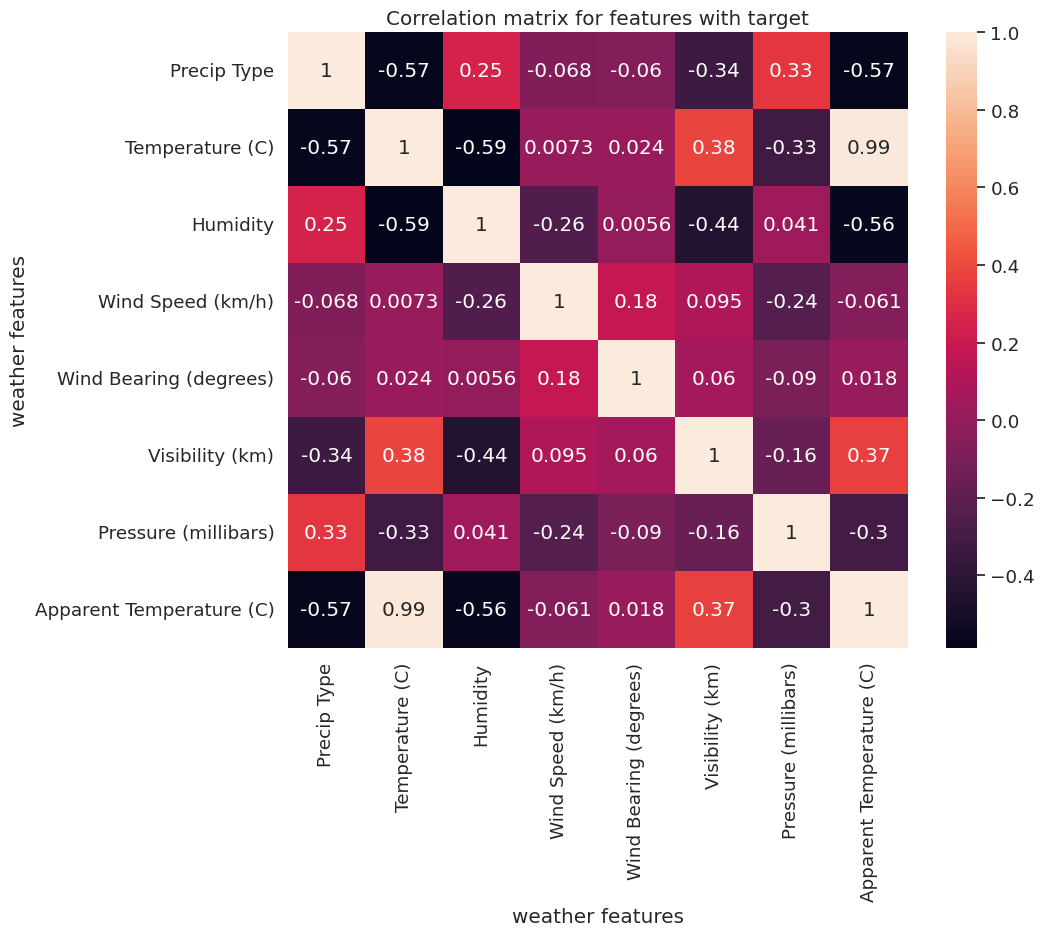

In [35]:
# correlation matrix with target
df_all = pd.concat([x_train.iloc[:,:7], y_train], axis=1)
correlation_mat = df_all.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix for features with target")
plt.xlabel("weather features")
plt.ylabel("weather features")
plt.show()

#### PCA-Principal Component Analysis

In [36]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
# check how many components should be remaind
pca.explained_variance_ratio_

array([3.19932151e-01, 1.80705573e-01, 1.36479643e-01, 1.25331007e-01,
       9.51534075e-02, 4.34267464e-02, 3.79692484e-02, 2.54052370e-02,
       1.68391411e-02, 8.66968425e-03, 6.91494621e-03, 9.79955148e-04,
       6.73101851e-04, 6.24846938e-04, 2.56809325e-04, 1.67675722e-04,
       1.25473860e-04, 1.10086199e-04, 7.85506544e-05, 4.57534365e-05,
       3.70865266e-05, 3.70202761e-05, 3.68558132e-05, 1.47652230e-33])

In [37]:
pca = PCA(n_components=8)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

### Train model

In [38]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(x_train_pca,y_train)

### Prediction

In [52]:
print(x_test_pca[1])
predictions = lm.predict(x_test_pca)
y_hat = pd.DataFrame(predictions, columns=["Predicted Apparent Temperature (C)"])

print(y_test.head(10))
print(y_hat.head(10))

[-1.75035816  0.51627187  1.97198756 -0.10130539  1.56887127 -0.5808242
 -0.44204426 -0.05848265]
   Apparent Temperature (C)
0                 -0.624208
1                  1.388494
2                  1.568346
3                  0.370358
4                  0.110060
5                  1.390544
6                 -1.169400
7                  0.266341
8                  0.501532
9                 -0.041098
   Predicted Apparent Temperature (C)
0                           -0.668587
1                            1.348682
2                            1.520488
3                            0.357398
4                           -0.016781
5                            1.328637
6                           -1.000838
7                            0.032764
8                            0.436651
9                           -0.104374


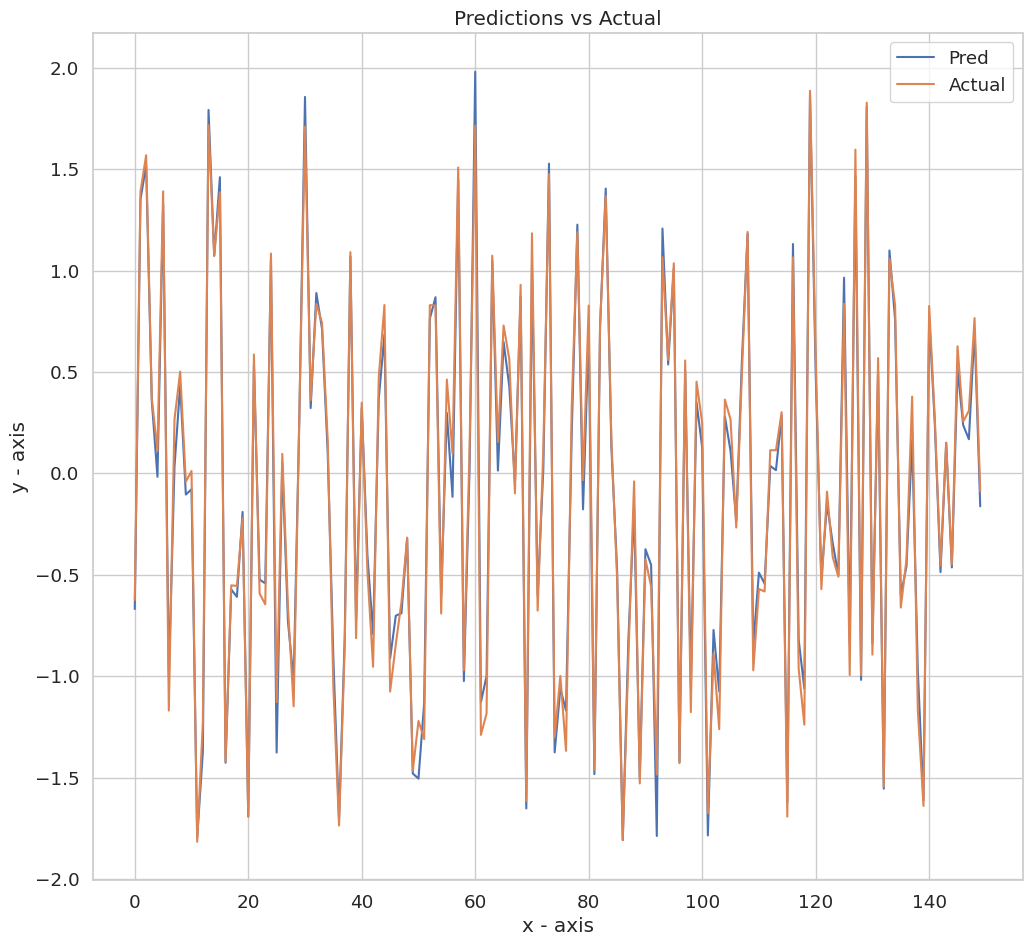

In [40]:
plt.plot(y_hat[:150], label = "Pred")
plt.plot(y_test[:150], label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Predictions vs Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### Model Evaluation

In [41]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_for_model=mean_squared_error(y_test, y_hat)
print("Mean squared error : "+str(mse_for_model))

#Root Mean Squared Error
from math import sqrt
rmsq_for_model = sqrt(mean_squared_error(y_test, y_hat))
print("Root mean squared error : "+str(rmsq_for_model))

Mean squared error : 0.010766713897563743
Root mean squared error : 0.10376277703282494


In [42]:
#Evaluating the Weight factors of the model
print(lm.coef_)


[[-0.52041909 -0.25402506 -0.21859849 -0.25939938  0.43934547 -0.06621529
  -0.56748857  0.08357258]]


In [43]:
# Necessary imports:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
x = pd.DataFrame(x_train_pca).append(pd.DataFrame(x_test_pca)).reset_index(drop=True)
y = y_train.append(y_test).reset_index(drop=True)
scores = cross_val_score(model, x, y, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.98875962 0.98884167 0.98898717 0.98802747 0.98909995 0.98889756]


In [44]:
predictions = cross_val_predict(model, x, y, cv=6)
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.9887742373714006


### Saving the trained model

In [45]:
import pickle

model_filename = 'multiple_linear_regression_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Trained model saved to {model_filename}")

Trained model saved to multiple_linear_regression_model.pkl


In [46]:
# Load the saved model from the file
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now, 'loaded_model' can be used for predictions

In [47]:
%run deploy_ML_model_on_Azure.ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.9/192.9 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Interactive authentication successfully completed.
Cleaning up past default Resource Group Deployments on the subscription to avoid limit of 10
Deleting past Resource Group Deployment with name: DeployResourceGroup-e5da84a764
Deploying KeyVault with name weatherlkeyvaultaaef854f.
Deploying StorageAccount with name weatherlstorageb46d755bb.
Deploying Workspace with name weather-lab.
Deploying AppInsights with name weatherlinsightsa46eed10.
Deployed AppInsights with name weatherlinsightsa46eed10. Took 55.27 seconds.
Deployed Workspace with name weather-lab. Took 25.02 seconds.
Workspace weather-lab created
Registering model weather_prediction_model
Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2024-01-27 14:35:14+00:00 Creating Container Registry if not exists..
2024-01-27 14:45:14+00:00 Registering the environment..
2024-01-27 14:45:21+00:00 Build

In [48]:
scoring_uri = service.scoring_uri

In [49]:
scoring_uri

'http://021b20e8-1bd8-4651-8733-a469c6fcd3a0.francecentral.azurecontainer.io/score'

In [53]:
%run Predict_from_Azure_Endpoint.ipynb

{'result': [[1.3486823168162096]]}
Prediction: [1.3486823168162096]


In [54]:
# Delete the service

service_name = "weather-prediction-service"

service = ws.webservices[service_name]
service.delete()

In [55]:
# Specify the name of the registered model to delete
model_name = 'weather_prediction_model'

# Delete the model
registered_model = ws.models[model_name]
registered_model.delete()

In [56]:
# Delete the workspace
ws.delete(delete_dependent_resources=True)